# Preprocessing Google Play Store Reviews for Fintech Apps

## Import Libraries and Functions

In [11]:
import os
import sys
import logging
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [12]:
app_ids = {
    'CBE': {'name': 'Commercial Bank of Ethiopia', 'file': 'commercial_bank_of_ethiopia_reviews.csv'},
    'BOA': {'name': 'Bank of Abyssinia', 'file': 'bank_of_abyssinia_reviews.csv'},
    'Dashen': {'name': 'Dashen Bank', 'file': 'dashen_bank_reviews.csv'}
}

# Define directories
RAW_DATA_DIR = '../data/raw'
PROCESSED_DATA_DIR = '../data/processed'
DOCS_DIR = '../docs'
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(DOCS_DIR, exist_ok=True)

## Data Quality Function

Define a function to log missing data percentages and warn if >5%.

In [13]:
def log_data_quality(df: pd.DataFrame, bank_name: str) -> None:
    missing_percent = df.isnull().mean() * 100
    logging.info(
        f'Missing data percentage for {bank_name}:\n{missing_percent.to_string()}')
    if missing_percent.max() > 5:
        logging.warning(
            f'Missing data for {bank_name} exceeds 5% in some columns')

## Preprocess Reviews

Define a function to preprocess reviews for a single bank using the modular scripts.

In [14]:
from scripts.preprocessing.remove_duplicates import remove_duplicates
from scripts.preprocessing.handle_missing_data import handle_missing_data
from scripts.preprocessing.normalize_dates import normalize_dates
from scripts.preprocessing.validate_ratings import validate_ratings
from scripts.preprocessing.load_data import load_reviews
from scripts.preprocessing.preprocess_reviews import preprocess_text
from scripts.preprocessing.visualize_data_quality import visualize_data_quality


def preprocess_bank_reviews(input_path: str, output_path: str, bank_name: str) -> pd.DataFrame:
    logging.info(f'Starting preprocessing for {bank_name}')

    # Load data
    df = load_reviews(input_path, bank_name)
    if df is None or df.empty:
        logging.error(
            f'No data loaded for {bank_name}. Skipping preprocessing.')
        return pd.DataFrame()

    display(df.head())
    logging.info(
        f'Initial missing data for {bank_name}:\n{df.isnull().sum().to_string()}')

    # Preprocessing steps
    df = remove_duplicates(df, bank_name)
    display(df.head()) # Inspect after duplicates

    df = handle_missing_data(df, bank_name)
    display(df.head())  # Inspect after missing data

    df = normalize_dates(df, bank_name)
    display(df.head())  # Inspect after date normalization

    df = validate_ratings(df, bank_name)
    display(df.head())  # Inspect after rating validation

    df['review_text'] = df['review_text'].astype(str).apply(preprocess_text)
    display(df.head())  

    # Log final data quality
    log_data_quality(df, bank_name)

    # Save cleaned CSV
    try:
        df.to_csv(output_path, index=False, encoding='utf-8')
        logging.info(f'Saved {len(df)} cleaned reviews to {output_path}')
    except Exception as e:
        logging.error(f'Error saving cleaned CSV for {bank_name}: {str(e)}')

    # Generate visualizations
    visualize_data_quality(df, bank_name, DOCS_DIR)

    return df

## Process Reviews for Each Bank

Loop through each bank’s raw CSV, preprocess, and visualize data quality.

,review_id,review_text,rating,date,bank_name,source
0,Commercial_Bank_of_Ethiopia_0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06 09:54:11,Commercial Bank of Ethiopia,Google Play
1,Commercial_Bank_of_Ethiopia_1,what is this app problem???,1,2025-06-05 22:16:56,Commercial Bank of Ethiopia,Google Play
2,Commercial_Bank_of_Ethiopia_2,the app is proactive and a good connections.,5,2025-06-05 15:55:10,Commercial Bank of Ethiopia,Google Play
3,Commercial_Bank_of_Ethiopia_3,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,Commercial Bank of Ethiopia,Google Play
4,Commercial_Bank_of_Ethiopia_4,good,4,2025-06-05 10:21:59,Commercial Bank of Ethiopia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Commercial_Bank_of_Ethiopia_0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06 09:54:11,Commercial Bank of Ethiopia,Google Play
1,Commercial_Bank_of_Ethiopia_1,what is this app problem???,1,2025-06-05 22:16:56,Commercial Bank of Ethiopia,Google Play
2,Commercial_Bank_of_Ethiopia_2,the app is proactive and a good connections.,5,2025-06-05 15:55:10,Commercial Bank of Ethiopia,Google Play
3,Commercial_Bank_of_Ethiopia_3,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,Commercial Bank of Ethiopia,Google Play
4,Commercial_Bank_of_Ethiopia_4,good,4,2025-06-05 10:21:59,Commercial Bank of Ethiopia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Commercial_Bank_of_Ethiopia_0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06 09:54:11,Commercial Bank of Ethiopia,Google Play
1,Commercial_Bank_of_Ethiopia_1,what is this app problem???,1,2025-06-05 22:16:56,Commercial Bank of Ethiopia,Google Play
2,Commercial_Bank_of_Ethiopia_2,the app is proactive and a good connections.,5,2025-06-05 15:55:10,Commercial Bank of Ethiopia,Google Play
3,Commercial_Bank_of_Ethiopia_3,I cannot send to cbebirr app. through this app.,3,2025-06-05 11:12:49,Commercial Bank of Ethiopia,Google Play
4,Commercial_Bank_of_Ethiopia_4,good,4,2025-06-05 10:21:59,Commercial Bank of Ethiopia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Commercial_Bank_of_Ethiopia_0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play
1,Commercial_Bank_of_Ethiopia_1,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
2,Commercial_Bank_of_Ethiopia_2,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,Google Play
3,Commercial_Bank_of_Ethiopia_3,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play
4,Commercial_Bank_of_Ethiopia_4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Commercial_Bank_of_Ethiopia_0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play
1,Commercial_Bank_of_Ethiopia_1,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
2,Commercial_Bank_of_Ethiopia_2,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,Google Play
3,Commercial_Bank_of_Ethiopia_3,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play
4,Commercial_Bank_of_Ethiopia_4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Commercial_Bank_of_Ethiopia_0,atm support transfer like country kenya nigeri...,4,2025-06-06,Commercial Bank of Ethiopia,Google Play
1,Commercial_Bank_of_Ethiopia_1,app problem,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
2,Commercial_Bank_of_Ethiopia_2,app proactive good connection,5,2025-06-05,Commercial Bank of Ethiopia,Google Play
3,Commercial_Bank_of_Ethiopia_3,send cbebirr app app,3,2025-06-05,Commercial Bank of Ethiopia,Google Play
4,Commercial_Bank_of_Ethiopia_4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play


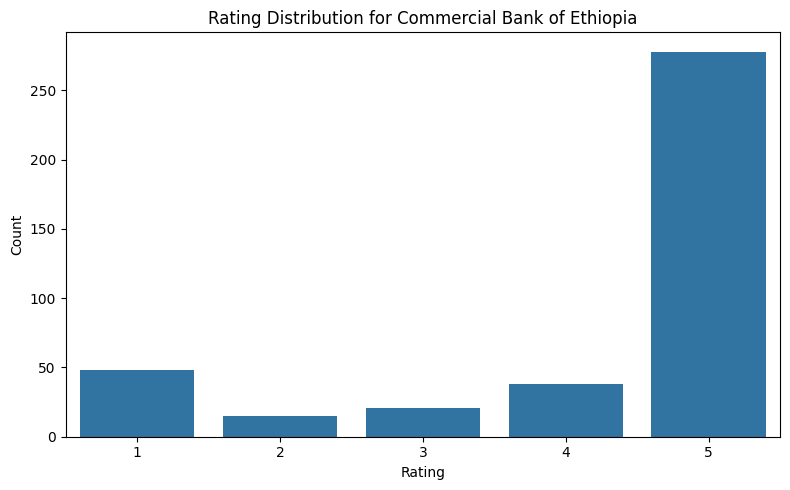

,rating
count,400.000000
mean,4.207500
std,1.392585
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


,review_id,review_text,rating,date,bank_name,source
0,Bank_of_Abyssinia_0,it's not working,3,2025-06-05 11:57:36,Bank of Abyssinia,Google Play
1,Bank_of_Abyssinia_1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03 16:21:34,Bank of Abyssinia,Google Play
2,Bank_of_Abyssinia_2,exceptional,5,2025-06-03 10:32:35,Bank of Abyssinia,Google Play
3,Bank_of_Abyssinia_3,BoA Mobile good bank,5,2025-06-02 14:25:12,Bank of Abyssinia,Google Play
4,Bank_of_Abyssinia_4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,Bank of Abyssinia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Bank_of_Abyssinia_0,it's not working,3,2025-06-05 11:57:36,Bank of Abyssinia,Google Play
1,Bank_of_Abyssinia_1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03 16:21:34,Bank of Abyssinia,Google Play
2,Bank_of_Abyssinia_2,exceptional,5,2025-06-03 10:32:35,Bank of Abyssinia,Google Play
3,Bank_of_Abyssinia_3,BoA Mobile good bank,5,2025-06-02 14:25:12,Bank of Abyssinia,Google Play
4,Bank_of_Abyssinia_4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,Bank of Abyssinia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Bank_of_Abyssinia_0,it's not working,3,2025-06-05 11:57:36,Bank of Abyssinia,Google Play
1,Bank_of_Abyssinia_1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03 16:21:34,Bank of Abyssinia,Google Play
2,Bank_of_Abyssinia_2,exceptional,5,2025-06-03 10:32:35,Bank of Abyssinia,Google Play
3,Bank_of_Abyssinia_3,BoA Mobile good bank,5,2025-06-02 14:25:12,Bank of Abyssinia,Google Play
4,Bank_of_Abyssinia_4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,Bank of Abyssinia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Bank_of_Abyssinia_0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play
1,Bank_of_Abyssinia_1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play
2,Bank_of_Abyssinia_2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play
3,Bank_of_Abyssinia_3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play
4,Bank_of_Abyssinia_4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Bank_of_Abyssinia_0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play
1,Bank_of_Abyssinia_1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play
2,Bank_of_Abyssinia_2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play
3,Bank_of_Abyssinia_3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play
4,Bank_of_Abyssinia_4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Bank_of_Abyssinia_0,working,3,2025-06-05,Bank of Abyssinia,Google Play
1,Bank_of_Abyssinia_1,hello facing problem boa mobile app every time...,1,2025-06-03,Bank of Abyssinia,Google Play
2,Bank_of_Abyssinia_2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play
3,Bank_of_Abyssinia_3,boa mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play
4,Bank_of_Abyssinia_4,worest app loading,1,2025-06-01,Bank of Abyssinia,Google Play


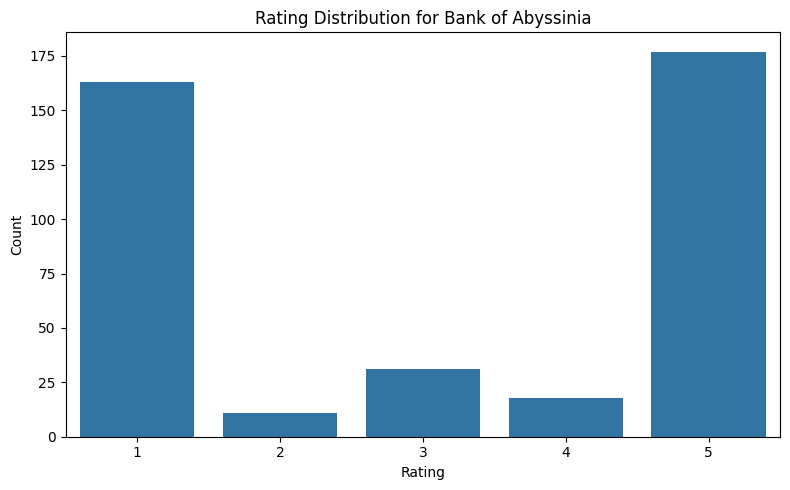

,rating
count,400.00000
mean,3.08750
std,1.86374
min,1.00000
25%,1.00000
50%,3.00000
75%,5.00000
max,5.00000


,review_id,review_text,rating,date,bank_name,source
0,Dashen_Bank_0,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play
1,Dashen_Bank_1,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play
2,Dashen_Bank_2,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play
3,Dashen_Bank_3,gadaa,5,2025-06-01 17:10:53,Dashen Bank,Google Play
4,Dashen_Bank_4,Massive upgrade from the Amole app.,5,2025-05-31 23:04:04,Dashen Bank,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Dashen_Bank_0,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play
1,Dashen_Bank_1,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play
2,Dashen_Bank_2,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play
3,Dashen_Bank_3,gadaa,5,2025-06-01 17:10:53,Dashen Bank,Google Play
4,Dashen_Bank_4,Massive upgrade from the Amole app.,5,2025-05-31 23:04:04,Dashen Bank,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Dashen_Bank_0,love,3,2025-06-06 00:15:44,Dashen Bank,Google Play
1,Dashen_Bank_1,መቸሸጠ,5,2025-06-03 19:40:31,Dashen Bank,Google Play
2,Dashen_Bank_2,wow,5,2025-06-03 17:30:11,Dashen Bank,Google Play
3,Dashen_Bank_3,gadaa,5,2025-06-01 17:10:53,Dashen Bank,Google Play
4,Dashen_Bank_4,Massive upgrade from the Amole app.,5,2025-05-31 23:04:04,Dashen Bank,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Dashen_Bank_0,love,3,2025-06-06,Dashen Bank,Google Play
1,Dashen_Bank_1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play
2,Dashen_Bank_2,wow,5,2025-06-03,Dashen Bank,Google Play
3,Dashen_Bank_3,gadaa,5,2025-06-01,Dashen Bank,Google Play
4,Dashen_Bank_4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Dashen_Bank_0,love,3,2025-06-06,Dashen Bank,Google Play
1,Dashen_Bank_1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play
2,Dashen_Bank_2,wow,5,2025-06-03,Dashen Bank,Google Play
3,Dashen_Bank_3,gadaa,5,2025-06-01,Dashen Bank,Google Play
4,Dashen_Bank_4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank,Google Play


,review_id,review_text,rating,date,bank_name,source
0,Dashen_Bank_0,love,3,2025-06-06,Dashen Bank,Google Play
1,Dashen_Bank_1,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play
2,Dashen_Bank_2,wow,5,2025-06-03,Dashen Bank,Google Play
3,Dashen_Bank_3,gadaa,5,2025-06-01,Dashen Bank,Google Play
4,Dashen_Bank_4,massive upgrade amole app,5,2025-05-31,Dashen Bank,Google Play


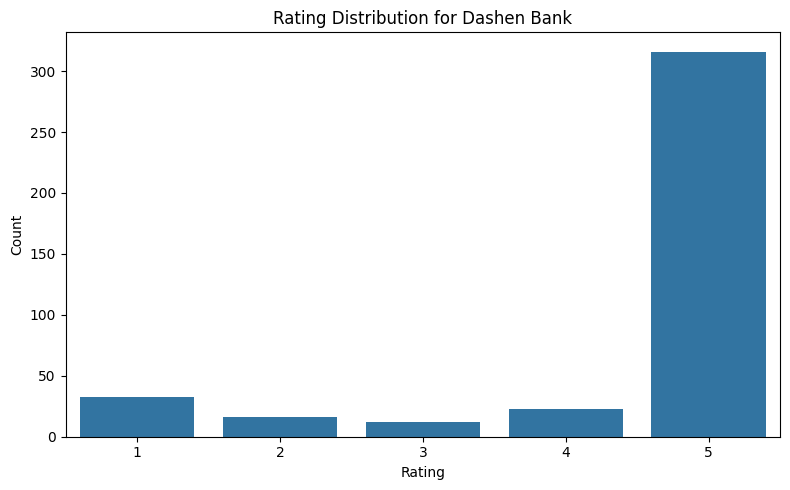

,rating
count,400.000000
mean,4.432500
std,1.240682
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
# Main processing loop
total_reviews = 0

for bank, info in app_ids.items():
    input_path = os.path.join(RAW_DATA_DIR, info['file'])
    output_path = os.path.join(
        PROCESSED_DATA_DIR, f"{info['file'].replace('.csv', '_clean.csv')}")

    # Preprocess reviews
    df = preprocess_bank_reviews(input_path, output_path, info['name'])

    # Update total review count
    if not df.empty:
        total_reviews += len(df)
        display(df.describe())  # Show summary statistics

logging.info(f'Total cleaned reviews across all banks: {total_reviews}')

## Data Quality Summary

- **Duplicates**: Removed based on `review_text` and `date`.
- **Missing Data**: Dropped rows with missing `review_text` or `rating`. Ensured <5% missing data.
- **Date Normalization**: Converted `date` to `YYYY-MM-DD`.
- **Rating Validation**: Ensured ratings are 1–5.
- **Outputs**:
  - `data/processed/commercial_bank_of_ethiopia_reviews_clean.csv`
  - `data/processed/bank_of_abyssinia_reviews_clean.csv`
  - `data/processed/dashen_bank_reviews_clean.csv`
- **Visualizations**:
  - Missing data plots: `docs/*_missing_data.png`
  - Rating distribution plots: `docs/*_rating_distribution.png`

Check `logs/preprocess_reviews.log` for details.

## Next Steps
- Verify cleaned CSVs in `data/processed/` for 400+ reviews per bank and <5% missing data.
- Review visualizations in `docs/`.
- Proceed to Task 2: Sentiment and thematic analysis using cleaned CSVs.